Matplotlib is building the font cache; this may take a moment.


Data loaded successfully.
Dataset shape: (99, 23)

--- Starting Visualizations ---


/var/folders/f9/3j_2mkts77b30rz19hnbtlnw0000gn/T/ipykernel_65110/2258544790.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=rating_order, palette='viridis')


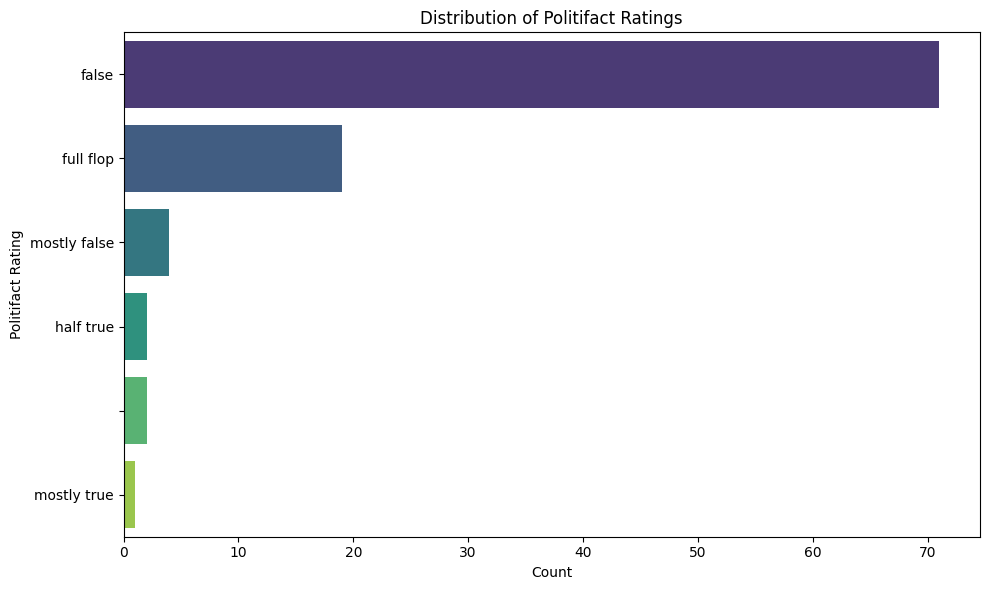

Viz 1: Shows the frequency of each fact-check rating.


/var/folders/f9/3j_2mkts77b30rz19hnbtlnw0000gn/T/ipykernel_65110/2258544790.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='social_platform_cleaned', order=df['social_platform_cleaned'].value_counts().index, palette='magma')


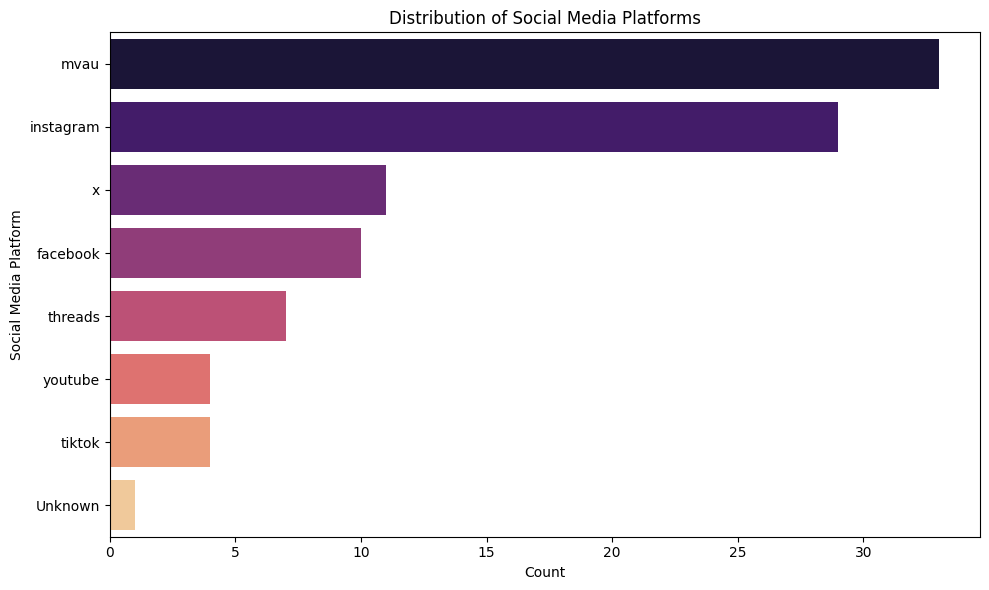

Viz 2: Shows which platforms are most common sources in this dataset.


/var/folders/f9/3j_2mkts77b30rz19hnbtlnw0000gn/T/ipykernel_65110/2258544790.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ooc_counts.values, y=ooc_counts.index, palette='crest')


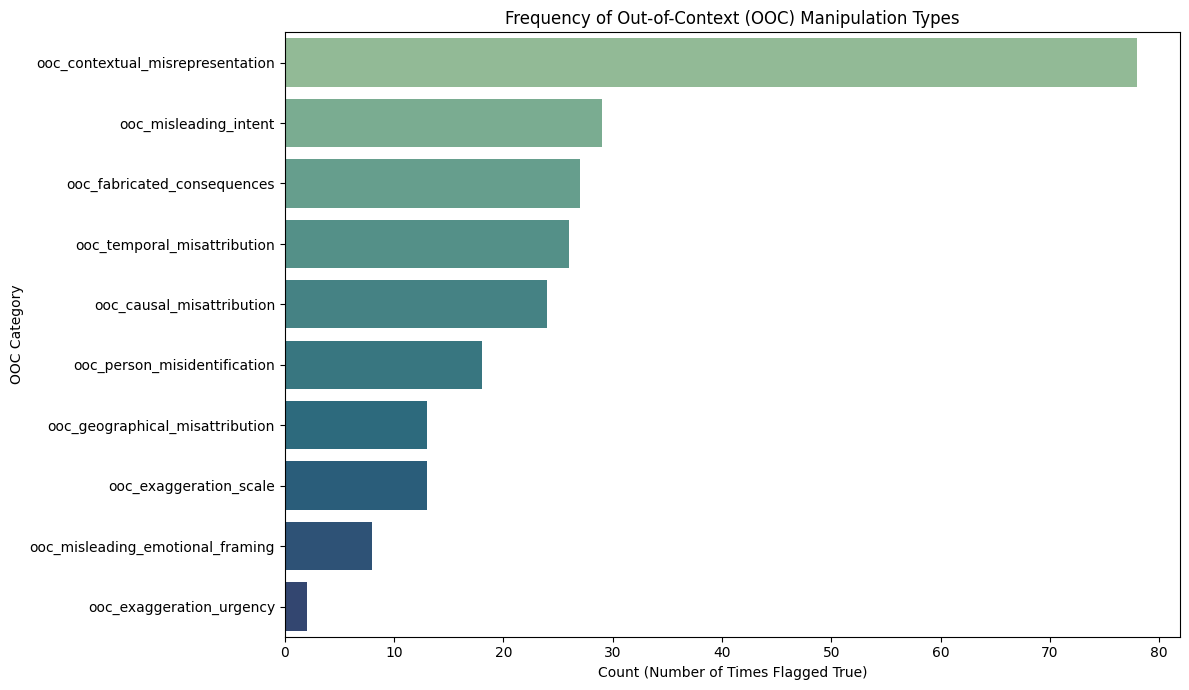

Viz 3: Highlights the most common types of out-of-context manipulations identified.


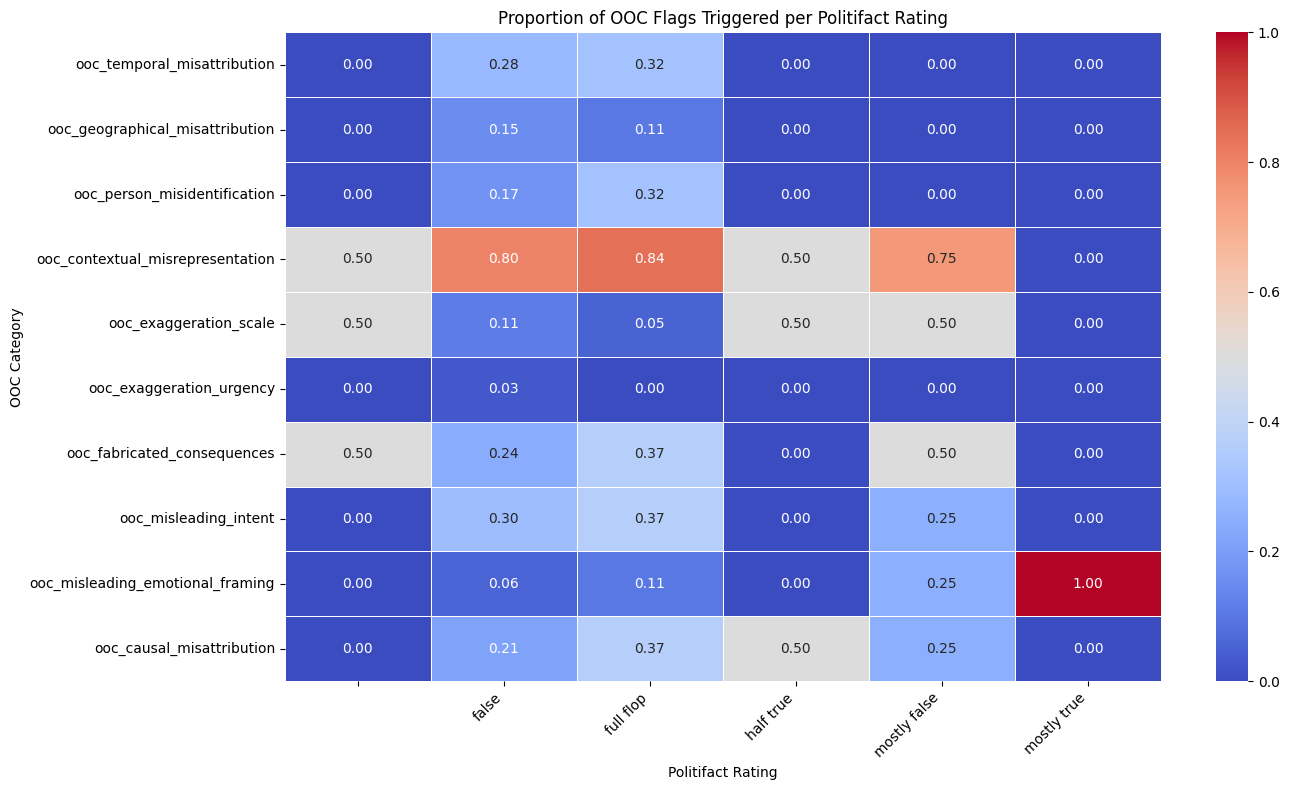

Viz 4: Explores if certain ratings are associated with specific OOC manipulation types (heatmap shows proportion).


<Figure size 1200x800 with 0 Axes>

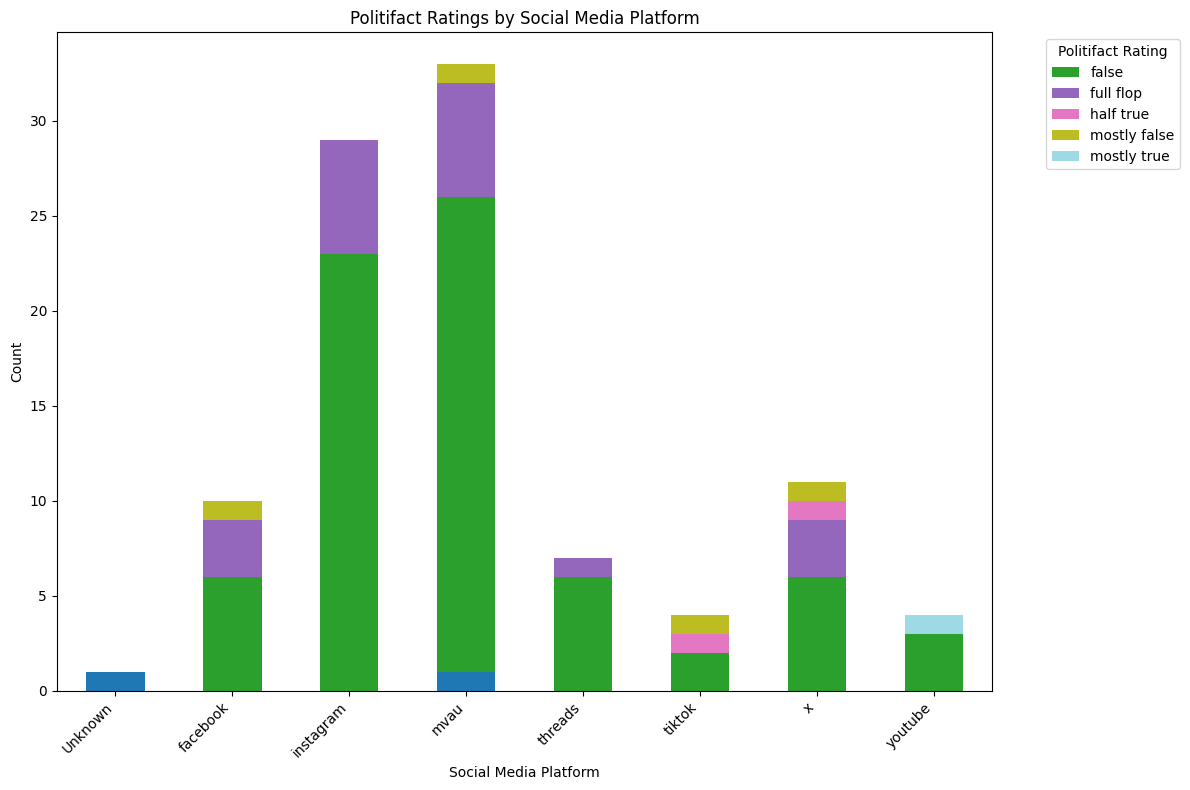

Viz 5: Shows the distribution of ratings for each social media platform.


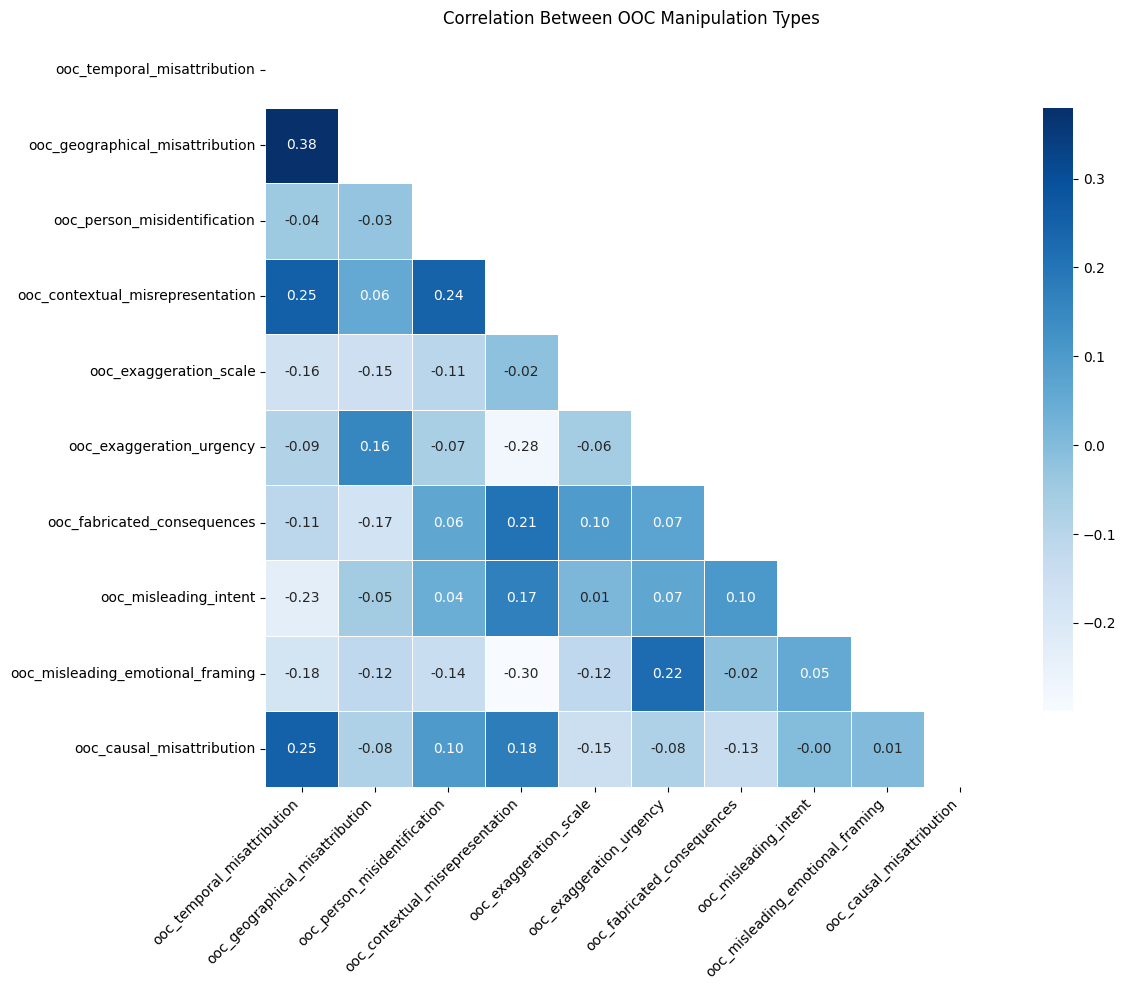

Viz 6: Reveals if certain OOC manipulations tend to occur together.


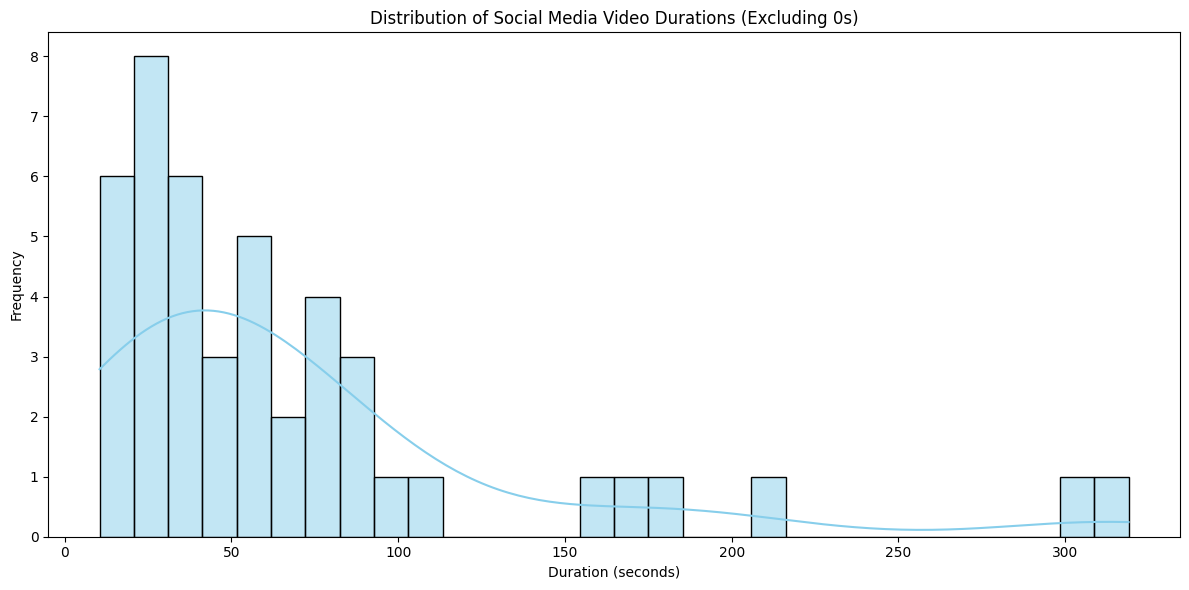

Viz 7: Shows the distribution of video lengths for the social media content.


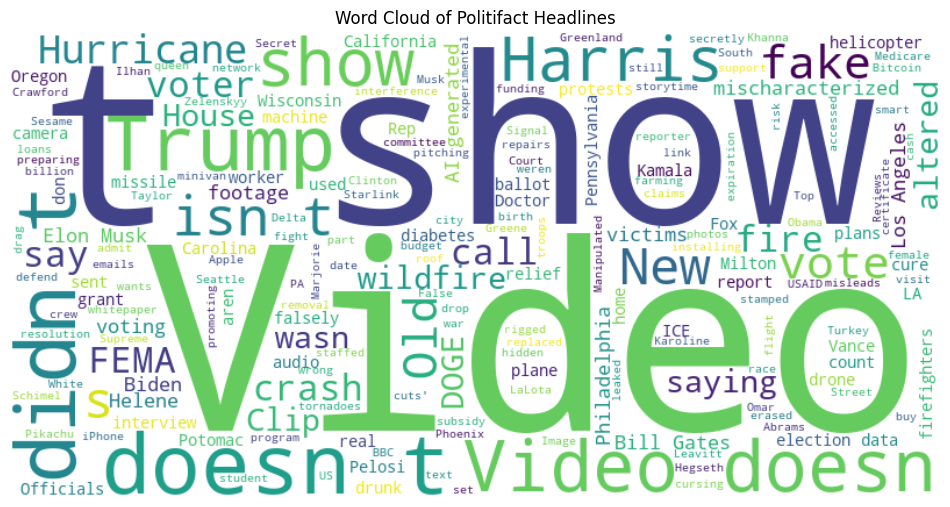

Viz 8: Highlights common words used in the Politifact headlines.


/var/folders/f9/3j_2mkts77b30rz19hnbtlnw0000gn/T/ipykernel_65110/2258544790.py:158: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='rating', y='num_ooc_flags', order=rating_order, palette='coolwarm')


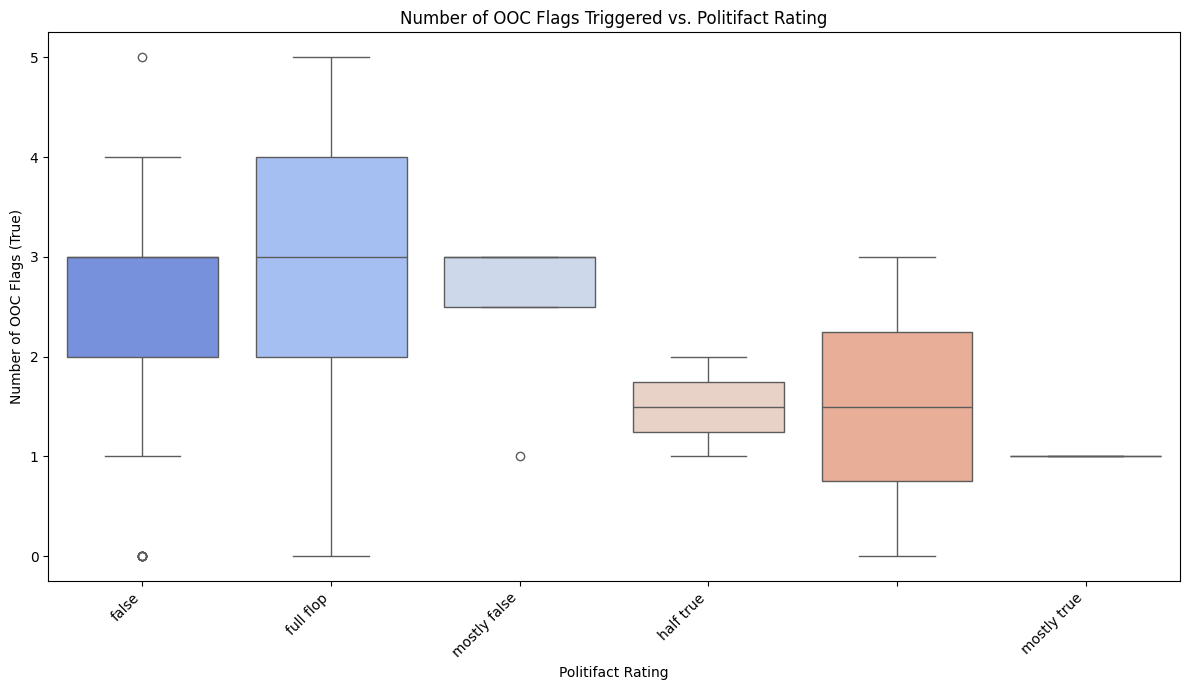

Viz 9: Investigates if the *number* of OOC issues correlates with the fact-check rating.


/var/folders/f9/3j_2mkts77b30rz19hnbtlnw0000gn/T/ipykernel_65110/2258544790.py:184: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=reputation_series, palette='pastel')


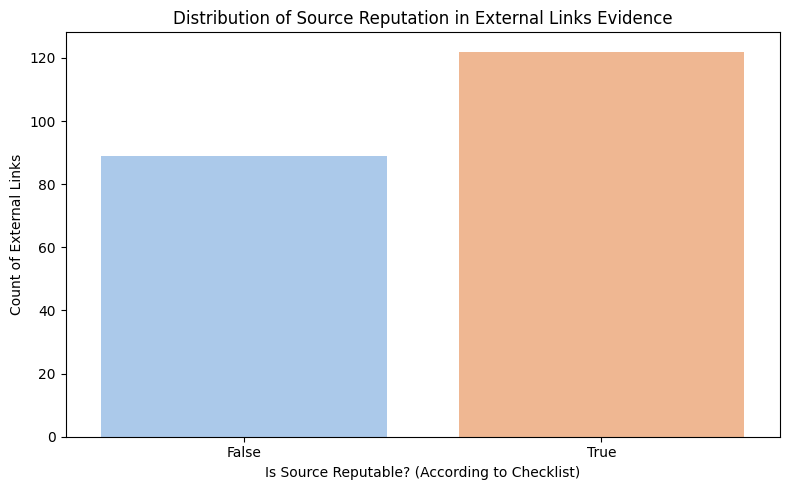

Viz 10: Shows the distribution of the 'source_reputation' flag across all collected external evidence links.

--- All Visualizations Complete ---


In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np # For correlation heatmap mask

# --- 1. Load the Data ---
try:
    with open('data.json', 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data)
    print("Data loaded successfully.")
    print(f"Dataset shape: {df.shape}")
    # print(df.info()) # Uncomment to see column types and non-null counts
    # print(df.head()) # Uncomment to see the first few rows
except FileNotFoundError:
    print("Error: data.json not found. Make sure the file is in the correct directory.")
    exit()
except json.JSONDecodeError:
    print("Error: Could not decode data.json. Please check the file format.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred during loading: {e}")
    exit()

# --- Preprocessing & Helper Variables ---
# Identify OOC (Out of Context) columns
ooc_cols = [col for col in df.columns if col.startswith('ooc_')]

# Calculate number of OOC flags per entry
df['num_ooc_flags'] = df[ooc_cols].sum(axis=1)

# Define specific rating order for plots if needed
rating_order = df['rating'].value_counts().index # Or define manually: ['false', 'full flop', ...]

# Define colors for consistency if desired
# rating_palette = sns.color_palette("viridis", n_colors=len(df['rating'].unique()))

print("\n--- Starting Visualizations ---")

# --- 2. Visualization 1: Distribution of Politifact Ratings ---
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='rating', order=rating_order, palette='viridis')
plt.title('Distribution of Politifact Ratings')
plt.xlabel('Count')
plt.ylabel('Politifact Rating')
plt.tight_layout()
plt.show()
print("Viz 1: Shows the frequency of each fact-check rating.")

# --- 3. Visualization 2: Distribution of Social Media Platforms ---
plt.figure(figsize=(10, 6))
# Replace potential empty strings or None with 'Unknown' for plotting
df['social_platform_cleaned'] = df['social_platform'].fillna('Unknown').replace('', 'Unknown')
sns.countplot(data=df, y='social_platform_cleaned', order=df['social_platform_cleaned'].value_counts().index, palette='magma')
plt.title('Distribution of Social Media Platforms')
plt.xlabel('Count')
plt.ylabel('Social Media Platform')
plt.tight_layout()
plt.show()
print("Viz 2: Shows which platforms are most common sources in this dataset.")

# --- 4. Visualization 3: Frequency of Each 'Out of Context' (OOC) Category ---
ooc_counts = df[ooc_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
sns.barplot(x=ooc_counts.values, y=ooc_counts.index, palette='crest')
plt.title('Frequency of Out-of-Context (OOC) Manipulation Types')
plt.xlabel('Count (Number of Times Flagged True)')
plt.ylabel('OOC Category')
plt.tight_layout()
plt.show()
print("Viz 3: Highlights the most common types of out-of-context manipulations identified.")

# --- 5. Visualization 4: Relationship Between OOC Categories and Politifact Rating ---
# Calculate proportion of each OOC category being True for each rating
ooc_rating_pivot = df.groupby('rating')[ooc_cols].mean() # .mean() on boolean gives proportion

plt.figure(figsize=(14, 8))
sns.heatmap(ooc_rating_pivot.T, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Proportion of OOC Flags Triggered per Politifact Rating')
plt.xlabel('Politifact Rating')
plt.ylabel('OOC Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Viz 4: Explores if certain ratings are associated with specific OOC manipulation types (heatmap shows proportion).")

# --- 6. Visualization 5: Social Media Platform vs. Politifact Rating ---
platform_rating_ct = pd.crosstab(df['social_platform_cleaned'], df['rating'])
# Filter out platforms with very few entries if needed for clarity
# platform_rating_ct_filtered = platform_rating_ct[platform_rating_ct.sum(axis=1) > 2]

plt.figure(figsize=(12, 8))
platform_rating_ct.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Politifact Ratings by Social Media Platform')
plt.xlabel('Social Media Platform')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Politifact Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
print("Viz 5: Shows the distribution of ratings for each social media platform.")


# --- 7. Visualization 6: Correlation Between Different OOC Categories ---
# Convert boolean OOC columns to integers (0/1) for correlation
ooc_int_df = df[ooc_cols].astype(int)
corr_matrix = ooc_int_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='Blues', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Between OOC Manipulation Types')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
print("Viz 6: Reveals if certain OOC manipulations tend to occur together.")

# --- 8. Visualization 7: Distribution of Social Media Content Duration (for Videos) ---
# Filter out entries with duration 0 (likely not videos or duration not captured)
video_durations = df[df['social_duration'] > 0]['social_duration']

if not video_durations.empty:
    plt.figure(figsize=(12, 6))
    sns.histplot(video_durations, bins=30, kde=True, color='skyblue')
    plt.title('Distribution of Social Media Video Durations (Excluding 0s)')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')
    # Optional: Log scale if highly skewed
    # plt.xscale('log')
    # plt.xlabel('Duration (seconds, log scale)')
    plt.tight_layout()
    plt.show()
    print("Viz 7: Shows the distribution of video lengths for the social media content.")
else:
    print("Viz 7: No entries with social_duration > 0 found. Skipping duration plot.")


# --- 9. Visualization 8: Word Cloud of Politifact Headlines ---
headlines_text = ' '.join(df['politifact_headline'].dropna())
if headlines_text:
    wordcloud_headlines = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(headlines_text)
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud_headlines, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Politifact Headlines')
    plt.show()
    print("Viz 8: Highlights common words used in the Politifact headlines.")
else:
     print("Viz 8: No headline text found. Skipping headline word cloud.")

# --- 10. Visualization 9: Number of OOC Flags per Entry vs. Politifact Rating ---
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='rating', y='num_ooc_flags', order=rating_order, palette='coolwarm')
# Add strip plot for individual points (optional, can be noisy)
# sns.stripplot(data=df, x='rating', y='num_ooc_flags', order=rating_order, color=".25", size=3, alpha=0.5)
plt.title('Number of OOC Flags Triggered vs. Politifact Rating')
plt.xlabel('Politifact Rating')
plt.ylabel('Number of OOC Flags (True)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Viz 9: Investigates if the *number* of OOC issues correlates with the fact-check rating.")

# --- 11. Visualization 10: Analysis of External Link Checklists (Source Reputation) ---
# This requires extracting nested data
reputation_data = []
for links_list in df['external_links_info']:
    if isinstance(links_list, list): # Check if it's a list
        for link_info in links_list:
            # Safely access nested keys
            checklist = link_info.get('checklist', {})
            reputation = checklist.get('source_reputation')
            if reputation is not None: # Check if the key exists and has a value
                 reputation_data.append(reputation)

if reputation_data:
    reputation_series = pd.Series(reputation_data)
    plt.figure(figsize=(8, 5))
    sns.countplot(x=reputation_series, palette='pastel')
    plt.title('Distribution of Source Reputation in External Links Evidence')
    plt.xlabel('Is Source Reputable? (According to Checklist)')
    plt.ylabel('Count of External Links')
    plt.xticks(ticks=[0, 1], labels=['False', 'True'])
    plt.tight_layout()
    plt.show()
    print("Viz 10: Shows the distribution of the 'source_reputation' flag across all collected external evidence links.")
else:
    print("Viz 10: No 'source_reputation' data found in external_links_info. Skipping plot.")

print("\n--- All Visualizations Complete ---")

Data loaded successfully.

--- Generating Word Cloud ---


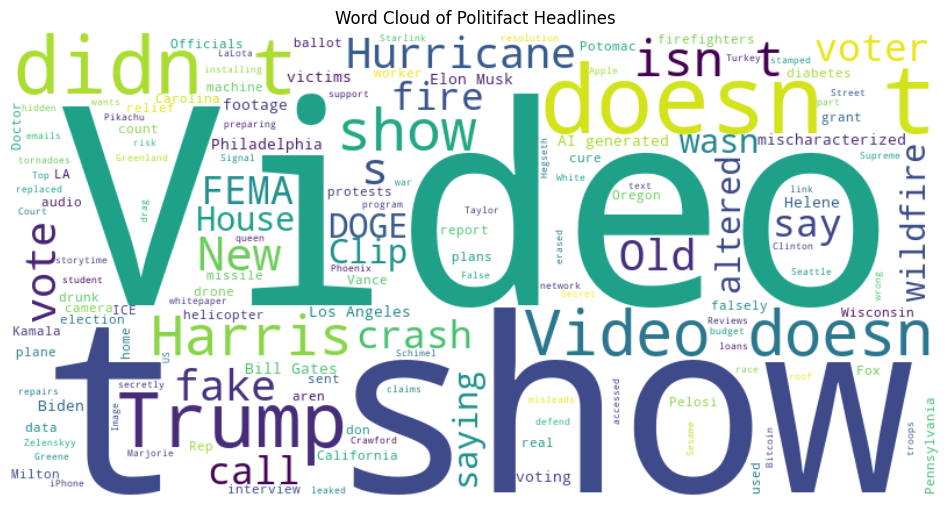

Word cloud generated and displayed.

--- Word Cloud Generation Complete ---


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import sys # To exit gracefully on error

# --- 1. Load the Data ---
try:
    with open('data.json', 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: data.json not found. Make sure the file is in the correct directory.")
    sys.exit(1) # Exit the script
except json.JSONDecodeError:
    print("Error: Could not decode data.json. Please check the file format.")
    sys.exit(1) # Exit the script
except Exception as e:
    print(f"An unexpected error occurred during loading: {e}")
    sys.exit(1) # Exit the script

# --- 2. Generate Word Cloud of Politifact Headlines ---
print("\n--- Generating Word Cloud ---")

# Combine all headlines into a single string, handling potential missing values
headlines_text = ' '.join(df['politifact_headline'].dropna().astype(str))

# Check if there is any text to generate the word cloud from
if headlines_text.strip(): # .strip() removes leading/trailing whitespace
    # Create the WordCloud object
    wordcloud_headlines = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis', # You can change the colormap (e.g., 'magma', 'plasma', 'inferno')
        max_words=150,      # Limit the number of words displayed
        contour_width=1,
        contour_color='steelblue'
    ).generate(headlines_text)

    # Display the generated Word Cloud image
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud_headlines, interpolation='bilinear')
    plt.axis('off') # Hide the axes
    plt.title('Word Cloud of Politifact Headlines')
    plt.show()
    print("Word cloud generated and displayed.")
else:
     print("No valid headline text found to generate a word cloud. Skipping plot.")

print("\n--- Word Cloud Generation Complete ---")